In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('energydata_complete.csv')
df.drop('date',axis=1, inplace=True)

In [14]:
column_names = {'T1':'kitchenTemp(℃)', 'RH_1':'kitchen_Humidity(%)', 'T2':'livingroomTemp(℃)',
               'RH_2':'livingroom_Humidity(%)', 'T3':'laundryTemp(℃)','RH_3':'laundry_Humidity(%)',
                'T4':'officeTemp(℃)','RH_4':'office_Humidity(%)', 'T5':'bathroomTemp(℃)', 
                'RH_5': 'bathroom_Humidity(%)', 'T6':'outnorthTemp(℃)','RH_6':'outnorth_Humidity(%)',
               'T7': 'ironRoom(℃)','RH_7': 'ironRoom_Humidity(%)','T8':'teenRoom_Temp(℃)',
               'RH_8':'teenRoom_Humidity(%)', 'T9':'parentRoomTemp(℃)', 'RH_9':'parentRoom_Humidity(%)',
                'T_out':'outTemp(℃)', 'RH_out': 'outHum(%)', 'Windspeed':'windspeed(m/s)', 'Visibility':
                'visibility(km)', 'Tdewpoint':'tdewpoint(Â℃)', 'rv1':'randomVariable(non-dimensional)',
                'rv2': 'randomVariable(non-dimensional)'}
df = df.rename(columns=column_names)
df.head()

,Appliances,lights,kitchenTemp(℃),kitchen_Humidity(%),livingroomTemp(℃),livingroom_Humidity(%),laundryTemp(℃),laundry_Humidity(%),officeTemp(℃),office_Humidity(%),...,parentRoomTemp(℃),parentRoom_Humidity(%),outTemp(℃),Press_mm_hg,outHum(%),windspeed(m/s),visibility(km),tdewpoint(Â℃),randomVariable(non-dimensional),randomVariable(non-dimensional)
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['livingroomTemp(℃)','outTemp(℃)'])
room_target = normalised_df['livingroomTemp(℃)']


<AxesSubplot:xlabel='livingroomTemp(℃)', ylabel='outTemp(℃)'>

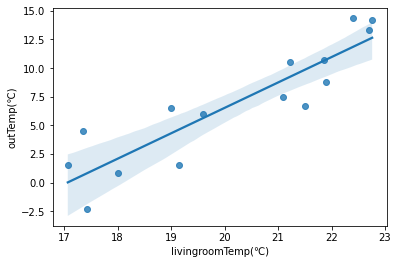

In [18]:
simple_linear_reg_df = df[['livingroomTemp(℃)','outTemp(℃)']].sample(15, random_state = 2)
sns.regplot(x='livingroomTemp(℃)', y='outTemp(℃)',data=simple_linear_reg_df)

In [27]:
from sklearn.linear_model  import LinearRegression 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,room_target,test_size=0.3,random_state=1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)


In [29]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.96

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.01)

In [32]:
from sklearn.metrics import mean_absolute_error 
mae= mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.021

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.03

In [35]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.0001)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.0001)